<a href="https://colab.research.google.com/github/marwan-hamzawy/48H_Challenge_Bias_Detection/blob/main/48H_Challenge_Bias_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libiraries

In [2]:
import pandas as pd

In [3]:
# file_path = '/content/drive/MyDrive/Datasets/data.csv'
# dff = pd.read_csv(file_path)
# dff

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/drive/MyDrive/Datasets/data.csv')

# --- Convert to appropriate types ---
df['Gender'] = df['Gender'].astype('category')
df['RecruitmentStrategy'] = df['RecruitmentStrategy'].astype('category')


In [5]:
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [6]:
# --- Check basic info ---
print("🔍 Data Info:")
print(df.info())  # Data types, nulls

🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1500 non-null   int64   
 1   Gender               1500 non-null   category
 2   EducationLevel       1500 non-null   int64   
 3   ExperienceYears      1500 non-null   int64   
 4   PreviousCompanies    1500 non-null   int64   
 5   DistanceFromCompany  1500 non-null   float64 
 6   InterviewScore       1500 non-null   int64   
 7   SkillScore           1500 non-null   int64   
 8   PersonalityScore     1500 non-null   int64   
 9   RecruitmentStrategy  1500 non-null   category
 10  HiringDecision       1500 non-null   int64   
dtypes: category(2), float64(1), int64(8)
memory usage: 108.8 KB
None


In [7]:
print("\n📊 Descriptive Statistics:")
print(df.describe(include='all'))  # Stats for all (numeric + categorical)


📊 Descriptive Statistics:
                Age  Gender  EducationLevel  ExperienceYears  \
count   1500.000000  1500.0     1500.000000      1500.000000   
unique          NaN     2.0             NaN              NaN   
top             NaN     0.0             NaN              NaN   
freq            NaN   762.0             NaN              NaN   
mean      35.148667     NaN        2.188000         7.694000   
std        9.252728     NaN        0.862449         4.641414   
min       20.000000     NaN        1.000000         0.000000   
25%       27.000000     NaN        2.000000         4.000000   
50%       35.000000     NaN        2.000000         8.000000   
75%       43.000000     NaN        3.000000        12.000000   
max       50.000000     NaN        4.000000        15.000000   

        PreviousCompanies  DistanceFromCompany  InterviewScore   SkillScore  \
count          1500.00000          1500.000000     1500.000000  1500.000000   
unique                NaN                  NaN

In [8]:
print("\n❓ Missing Values Count:")
print(df.isnull().sum())  # NaNs per column



❓ Missing Values Count:
Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


In [9]:
print("\n🎯 Unique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



🎯 Unique Values per Column:
Age: 31 unique values
Gender: 2 unique values
EducationLevel: 4 unique values
ExperienceYears: 16 unique values
PreviousCompanies: 5 unique values
DistanceFromCompany: 1500 unique values
InterviewScore: 101 unique values
SkillScore: 101 unique values
PersonalityScore: 101 unique values
RecruitmentStrategy: 3 unique values
HiringDecision: 2 unique values


/tmp/ipython-input-10-1757995443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HiringDecision', palette='Set2')
/tmp/ipython-input-10-1757995443.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set3')


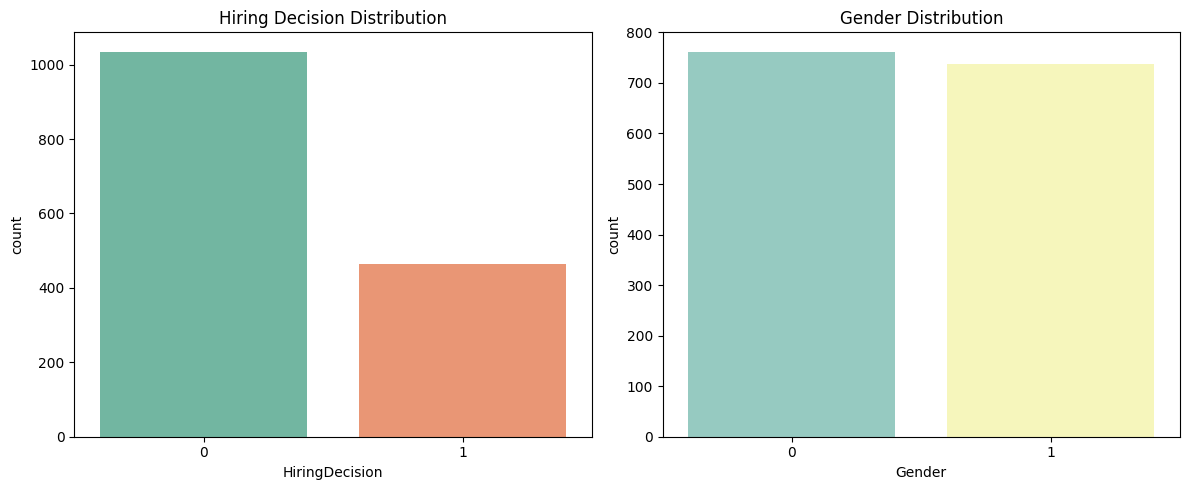

In [10]:
# --- Visualize Target and Gender distributions ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='HiringDecision', palette='Set2')
plt.title('Hiring Decision Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender', palette='Set3')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

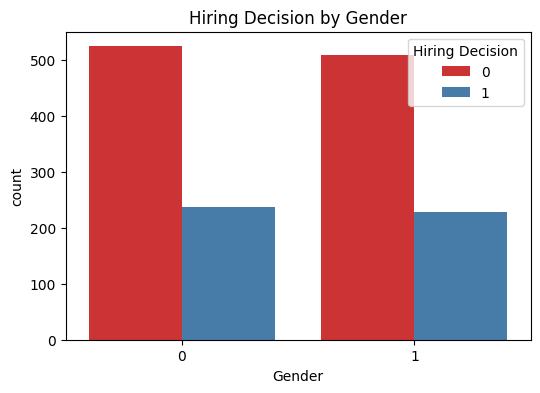

In [11]:
# --- Multivariate: Hiring Decision by Gender ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='HiringDecision', palette='Set1')
plt.title('Hiring Decision by Gender')
plt.legend(title='Hiring Decision', loc='upper right')
plt.show()

/tmp/ipython-input-12-1475774794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='HiringDecision', y='SkillScore', palette='coolwarm')


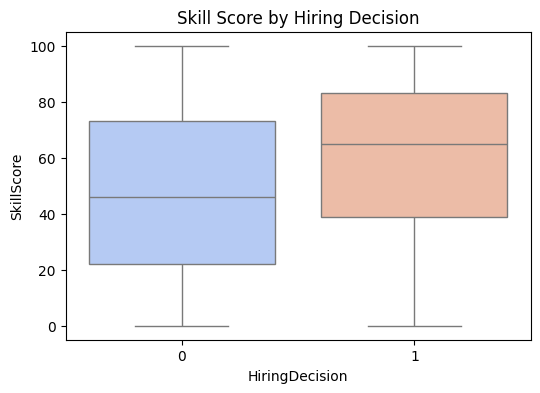

In [12]:
# --- Multivariate: SkillScore vs HiringDecision ---
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='HiringDecision', y='SkillScore', palette='coolwarm')
plt.title('Skill Score by Hiring Decision')
plt.show()

/tmp/ipython-input-13-460116139.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


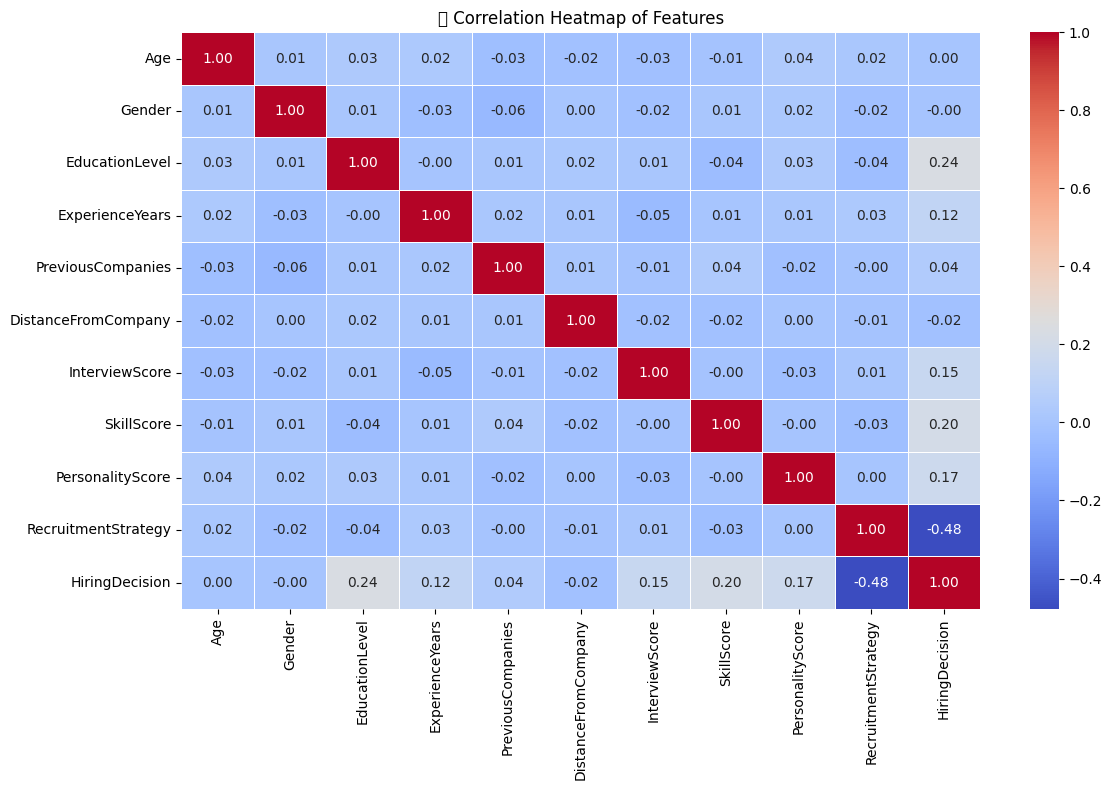

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy to convert categorical features to numeric temporarily
df_corr = df.copy()

# Convert categorical features to numeric for correlation purposes
df_corr['Gender'] = df_corr['Gender'].astype(int)
df_corr['RecruitmentStrategy'] = df_corr['RecruitmentStrategy'].astype(int)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('🔍 Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


/tmp/ipython-input-14-1287004410.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


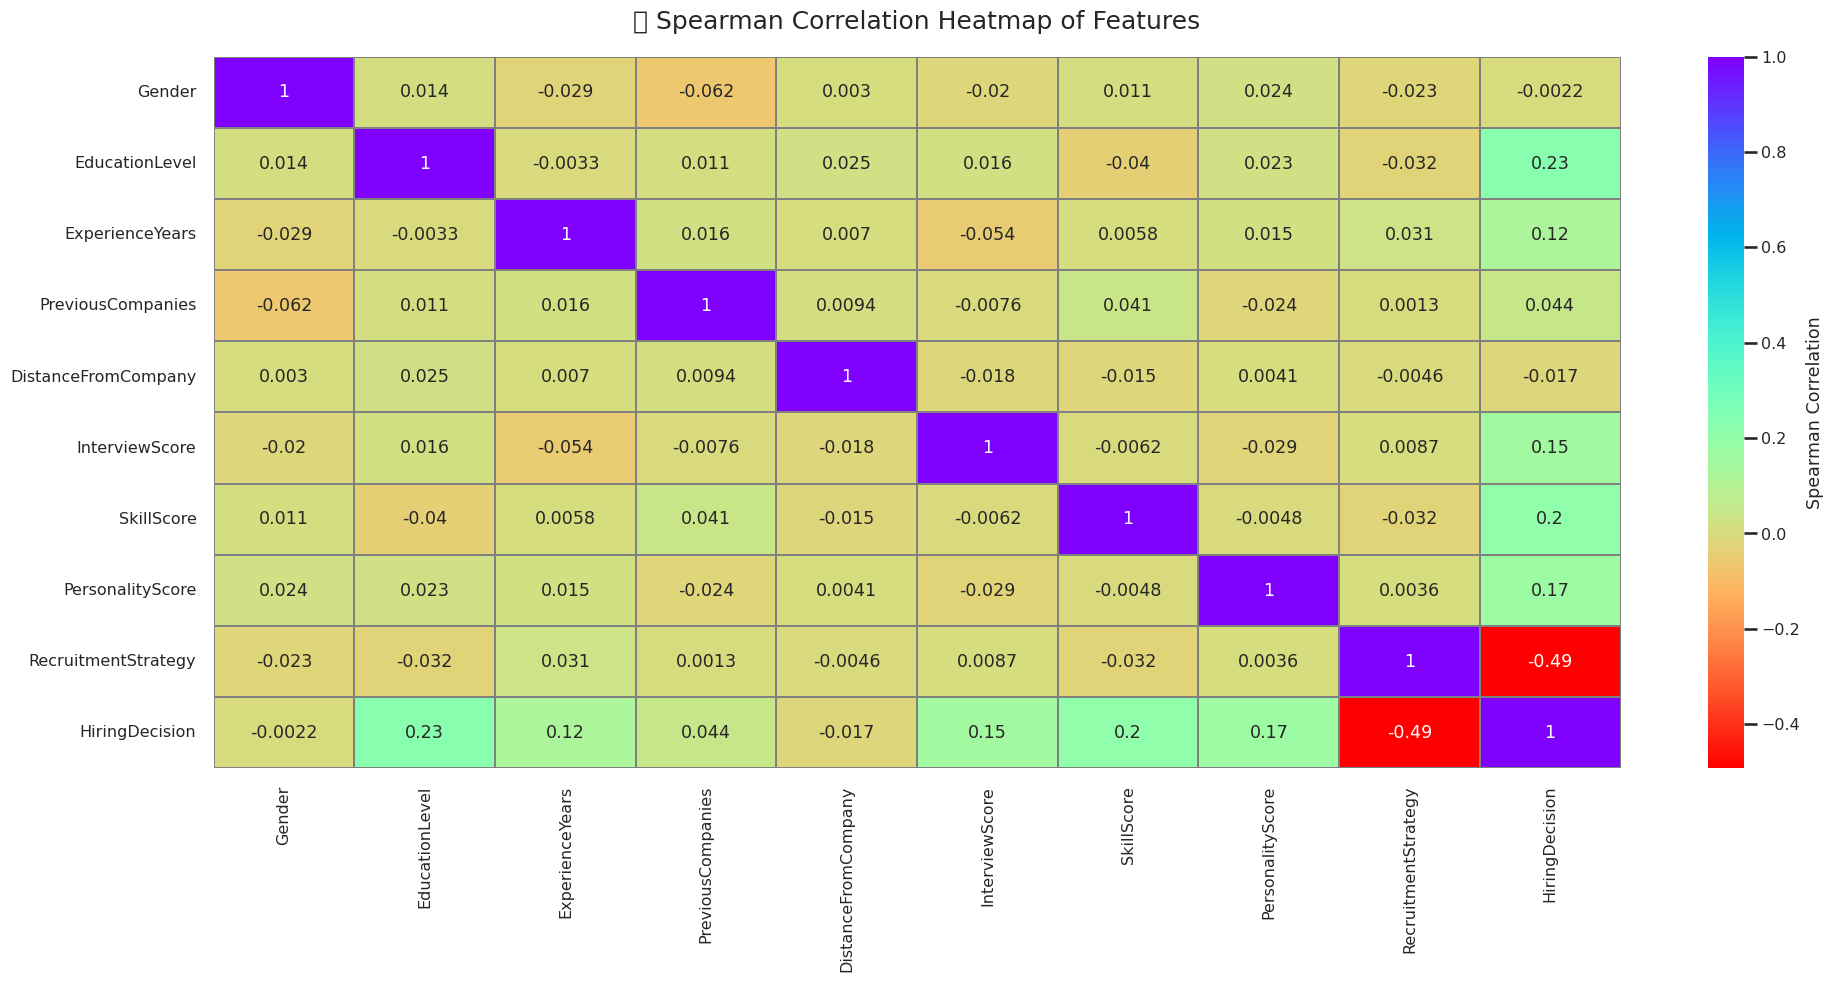

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Convert categorical to int temporarily if needed
df_corr = df.copy()
df_corr['Gender'] = df_corr['Gender'].astype(int)
df_corr['RecruitmentStrategy'] = df_corr['RecruitmentStrategy'].astype(int)

# Set plot aesthetics
sns.set(rc={'figure.figsize': (20, 10)})
sns.set_context("talk", font_scale=0.7)

# Spearman correlation heatmap
plt.figure()
sns.heatmap(
    df_corr.iloc[:, 1:].corr(method='spearman'),  # Skip Age if desired
    cmap='rainbow_r',
    annot=True,
    linewidths=0.3,
    linecolor='gray',
    cbar_kws={'label': 'Spearman Correlation'}
)

plt.title('🔍 Spearman Correlation Heatmap of Features', fontsize=18, pad=20)
plt.tight_layout()
plt.show()


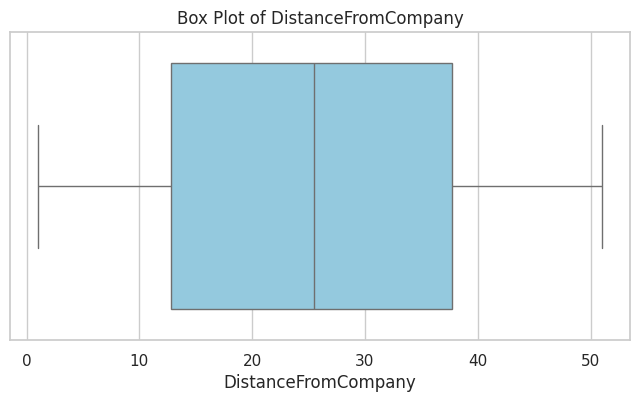

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['DistanceFromCompany'], color='skyblue')
plt.title('Box Plot of DistanceFromCompany')
plt.xlabel('DistanceFromCompany')
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    f1_score, accuracy_score, precision_score, recall_score
)
from sklearn.preprocessing import StandardScaler

# 1. Define target and features
target = 'HiringDecision'
features = df.drop(columns=[target]).columns

X = df[features]
y = df[target]

# 2. One-hot encode RecruitmentStrategy (nominal)
X = pd.get_dummies(X, columns=['RecruitmentStrategy'], drop_first=True)

# 3. Scale numeric features (except binary or already encoded)
to_scale = ['Age', 'ExperienceYears', 'PreviousCompanies',
            'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']
scaler = StandardScaler()
X[to_scale] = scaler.fit_transform(X[to_scale])
#$$$$$$$$$$$$$$$$$
X = X.apply(pd.to_numeric)
# 4. Train/Test Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Initialize models with class_weight for imbalance
rf_model = RandomForestClassifier(
    class_weight='balanced',  # handles imbalance
    random_state=42
)

xgb_model = XGBClassifier(
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # recommended for imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,

)

# 6. Fit models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 7. Predict
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# 8. Evaluate both models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 Evaluation Report: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=3))
    print(f"Macro F1 Score: {f1_score(y_true, y_pred, average='macro'):.3f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.3f}")

# Random Forest Evaluation
evaluate_model(y_test, rf_preds, "Random Forest")

# XGBoost Evaluation
evaluate_model(y_test, xgb_preds, "XGBoost")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:08:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Evaluation Report: Random Forest
Confusion Matrix:
[[204   3]
 [ 23  70]]

Classification Report:
              precision    recall  f1-score   support

           0      0.899     0.986     0.940       207
           1      0.959     0.753     0.843        93

    accuracy                          0.913       300
   macro avg      0.929     0.869     0.892       300
weighted avg      0.917     0.913     0.910       300

Macro F1 Score: 0.892
ROC AUC Score: 0.869

📊 Evaluation Report: XGBoost
Confusion Matrix:
[[202   5]
 [ 17  76]]

Classification Report:
              precision    recall  f1-score   support

           0      0.922     0.976     0.948       207
           1      0.938     0.817     0.874        93

    accuracy                          0.927       300
   macro avg      0.930     0.897     0.911       300
weighted avg      0.927     0.927     0.925       300

Macro F1 Score: 0.911
ROC AUC Score: 0.897


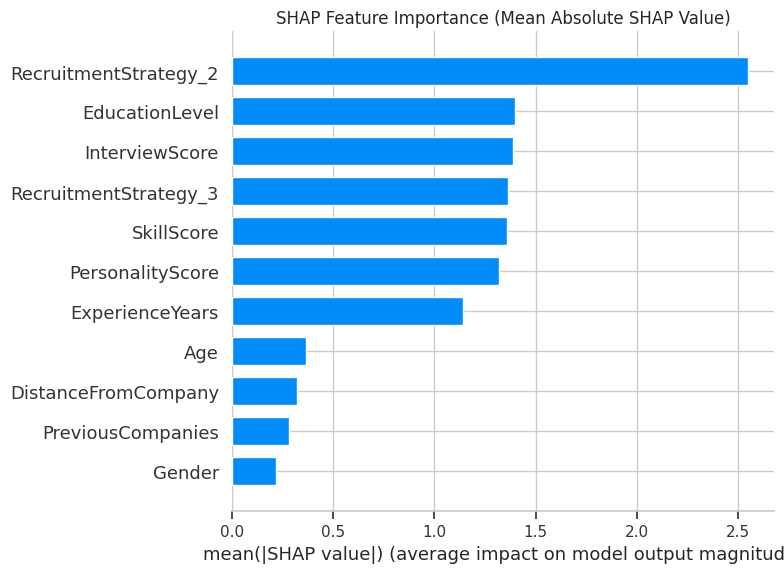

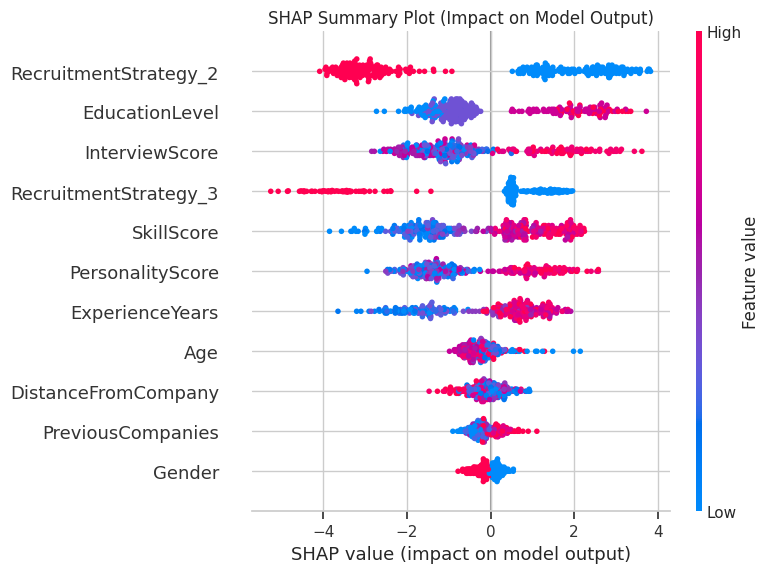

📊 Fairness Metrics by Gender (0=Female, 1=Male):
        Selection Rate  True Positive Rate  False Positive Rate
Gender                                                         
0             0.222222            0.750000             0.019231
1             0.314103            0.867925             0.029126


In [18]:
import shap
import matplotlib.pyplot as plt
from fairlearn.metrics import MetricFrame, selection_rate, true_positive_rate, false_positive_rate

# ✅ Force TreeExplainer (avoids PyTorch entirely)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# ✅ SHAP Feature Importance (Bar Plot)
plt.title("SHAP Feature Importance (Mean Absolute SHAP Value)")
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# ✅ SHAP Detailed Impact Plot (SHAP values vs feature values)
plt.title("SHAP Summary Plot (Impact on Model Output)")
shap.summary_plot(shap_values, X_test)
plt.show()

# ✅ Fairness metrics on Gender (0: Female, 1: Male)
y_pred = xgb_model.predict(X_test)
gender_test = df.loc[X_test.index, 'Gender']

metric_frame = MetricFrame(
    metrics={
        'Selection Rate': selection_rate,
        'True Positive Rate': true_positive_rate,
        'False Positive Rate': false_positive_rate
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=gender_test
)

# ✅ Display fairness by group
print("📊 Fairness Metrics by Gender (0=Female, 1=Male):")
print(metric_frame.by_group)


In [24]:
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate

# Compute TPR and FPR per gender group
metric_frame = MetricFrame(
    metrics={
        'TPR': true_positive_rate,
        'FPR': false_positive_rate
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=gender_test
)

# Calculate average odds difference manually
group_metrics = metric_frame.by_group

# Average Odds Difference = 0.5 * (|TPR_A - TPR_B| + |FPR_A - FPR_B|)
groups = group_metrics.index.tolist()
aod = 0.5 * (
    abs(group_metrics.loc[groups[0], 'TPR'] - group_metrics.loc[groups[1], 'TPR']) +
    abs(group_metrics.loc[groups[0], 'FPR'] - group_metrics.loc[groups[1], 'FPR'])
)

print("✅ Average Odds Difference:", round(aod, 4))


✅ Average Odds Difference: 0.0639
